### Predicting which outpatients are at high risk of being admitted to hospital for Chronic Heart Failure.
- Using DE-SynPUF inpatient and outpatient files downloaded from https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/DE_Syn_PUF.html
- Inpatient Claims 1,332,822 records
- Outpatient Claims 15,826,985 records

In [39]:
# import and read intial file Michelle has transformed/merged from inpatient/outpatient recods, 
# use NaN for elements with no values
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

df = pd.read_csv("OpToIp_OpNoAdmsn_Merged_Reduced_agg_DiagCode_join_BenefTable.csv", na_values = ['no info', '.'],low_memory=False)

In [40]:
#print(df.head(5))
print(df.shape) 

(1609245, 27)


In [43]:
#df.dtypes
print(df.columns)

Index(['Unnamed: 0', 'MEMBER_ID', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       'Median(days_op_to_ip)', 'HF label', 'BENE_SEX_IDENT_CD',
       'SP_STATE_CODE', 'BENE_RACE_CD', 'Age'],
      dtype='object')


In [42]:
print(df.head(5))

   Unnamed: 0         MEMBER_ID  1  2  3  4  5  6  7  8 ...   16  17  18  19  \
0           0  00000B48BCF4AD29  0  1  1  0  0  0  0  0 ...    0   0   1   0   
1           1  00001C24EE7B06AC  0  0  0  0  0  0  1  0 ...    1   0   2   0   
2           2  00003539A5D77654  0  0  0  0  2  0  1  0 ...    0   0   0   0   
3           3  0000525AB30E4DEF  0  0  2  0  0  1  1  0 ...    2   0   1   0   
4           4  00005B007DDAAC31  0  0  0  0  0  0  1  0 ...    1   0   4   0   

   Median(days_op_to_ip)  HF label  BENE_SEX_IDENT_CD  SP_STATE_CODE  \
0                   93.0         1                  1              S   
1                    0.0         0                  0              S   
2                    0.0         0                  0              M   
3                   18.5         0                  1              N   
4                    0.0         0                  0              S   

   BENE_RACE_CD  Age  
0             5   85  
1             1   72  
2             1  

In [63]:
# removing duplicate rows, 1424410 removed
#df_rm_dup= df.drop_duplicates(['MEMBER_ID','CLM_ID','OPFROM_DT','OPDIAG1',
#            'OPDIAG2','OPDIAG3','OPDIAG4','OPDIAG5',
#       'OPDIAG6', 'OPDIAG7', 'OPDIAG8', 'OPDIAG9','OPDIAG10',
#       'OPPRCDR1', 'OPPRCDR2', 'OPPRCDR3', 'OPPRCDR4', 'OPPRCDR5',
#        'OPPRCDR6','OPADMTNG_DIAG','OPHCPCS1','OPHCPCS2','OPHCPCS3','OPHCPCS4','OPHCPCS5'], keep='first')
# print(df_rm_dup.shape)

# checked and no duplicates to remove so commment out this code

In [7]:
#also delete duplicate DESYNPUF_ID before merge
#df_merge_subset = df_merge_subset.drop_duplicates(['DESYNPUF_ID'], keep='first')

In [45]:
# looking at count of catagorical data
cols = ['1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       'Median(days_op_to_ip)', 'HF label', 'BENE_SEX_IDENT_CD',
       'SP_STATE_CODE', 'BENE_RACE_CD', 'Age']
for name in cols:
    print(name,':')
    print(df[name].value_counts(),'\n')

1 :
0     1386369
1      173849
2       37184
3        8093
4        2281
5         780
6         281
7         160
8          89
9          50
10         33
11         22
13         11
12         10
14         10
15          7
16          5
17          5
19          2
20          2
21          1
22          1
Name: 1, dtype: int64 

2 :
0     1069484
1      282609
2      126225
3       55860
4       28448
5       15669
6        9219
7        5973
8        3957
9        2846
10       2065
11       1603
12       1279
13        958
14        756
15        583
16        448
17        319
18        269
19        191
20        119
21         98
22         85
23         52
24         42
25         26
27         21
26         20
28          6
29          5
31          5
33          2
34          1
32          1
38          1
Name: 2, dtype: int64 

3 :
0     516440
1     316528
2     222307
3     157997
4     115203
5      84690
6      61214
7      43186
8      30386
9      20937
10     13921

S    583787
W    353972
N    339743
M    306728
O     25015
Name: SP_STATE_CODE, dtype: int64 

BENE_RACE_CD :
1    1356326
2     158726
3      59784
5      34409
Name: BENE_RACE_CD, dtype: int64 

Age :
69    71174
66    71090
65    71006
68    70945
67    70700
70    61187
71    61037
74    60918
73    60802
72    60789
79    51627
77    51576
76    51556
78    51395
75    51126
80    42973
81    42658
82    42621
84    42585
83    42583
89    27878
85    27692
88    27625
86    27486
87    27195
57    11672
59    11631
61    11576
62    11563
60    11560
      ...  
50     8104
99     8096
91     8074
93     8050
90     8012
95     7960
92     7927
97     7909
98     7907
96     7890
43     4160
42     4124
39     4064
44     4055
37     4047
38     4031
35     4028
41     3959
36     3924
40     3897
28     2331
33     2312
31     2289
29     2273
26     2273
25     2260
32     2234
27     2221
34     2209
30     2203
Name: Age, Length: 75, dtype: int64 



In [71]:
df_model=df[['1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       'Median(days_op_to_ip)','BENE_SEX_IDENT_CD',
       'SP_STATE_CODE', 'BENE_RACE_CD', 'Age','HF label']]

In [72]:
# rename HF label column so no space
df_model.rename(columns={'HF label':'HF_label'}, inplace = True)
print(df_model.head(5))

   1  2  3  4  5  6  7  8  9  10    ...     16  17  18  19  \
0  0  1  1  0  0  0  0  0  0   0    ...      0   0   1   0   
1  0  0  0  0  0  0  1  0  0   0    ...      1   0   2   0   
2  0  0  0  0  2  0  1  0  0   0    ...      0   0   0   0   
3  0  0  2  0  0  1  1  0  1   1    ...      2   0   1   0   
4  0  0  0  0  0  0  1  0  0   0    ...      1   0   4   0   

   Median(days_op_to_ip)  BENE_SEX_IDENT_CD  SP_STATE_CODE  BENE_RACE_CD  Age  \
0                   93.0                  1              S             5   85   
1                    0.0                  0              S             1   72   
2                    0.0                  0              M             1   65   
3                   18.5                  1              N             1   88   
4                    0.0                  0              S             1   70   

   HF_label  
0         1  
1         0  
2         0  
3         0  
4         0  

[5 rows x 25 columns]


In [61]:
#vc = df_model.OPDIAG1.value_counts()
#df_model[df_model.OPDIAG1.isin(vc.index[vc.values > 40000])].OPDIAG1.value_counts()

### Exploratory Data Analysis

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
df_model['HF_label'].value_counts()

0    1580361
1      28884
Name: HF_label, dtype: int64

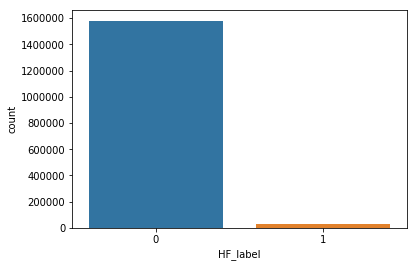

In [65]:
sns.countplot(x='HF_label', data=df_model)

### Balance classes

In [66]:
# Class count
count_class_0, count_class_1 = df_model.HF_label.value_counts()

# Divide by class
df_class_0 = df_model[df_model['HF_label'] == 0]
df_class_1 = df_model[df_model['HF_label'] == 1]

Random under-sampling:
1    28884
0    28884
Name: HF_label, dtype: int64


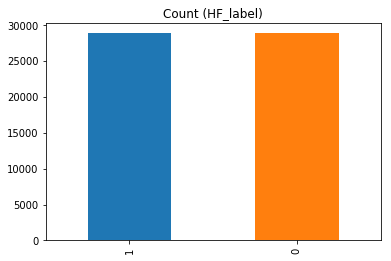

In [67]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.HF_label.value_counts())

df_test_under.HF_label.value_counts().plot(kind='bar', title='Count (HF_label)');

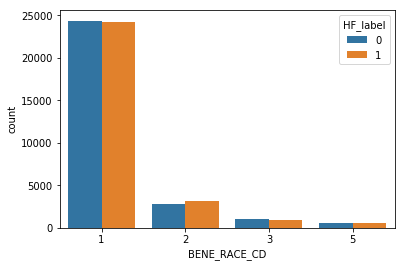

In [68]:
# 4280 frequency for race catagory
# {1:'White',2:'Black',3:'Other', 5:'Hispanic'}
sns.countplot(data=df_test_under,x='BENE_RACE_CD',hue='HF_label')

In [73]:
# looking at count of catagorical data
cols = ['1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       'Median(days_op_to_ip)','BENE_SEX_IDENT_CD',
       'SP_STATE_CODE', 'BENE_RACE_CD', 'Age', 'HF_label']
for name in cols:
    print(name,':')
    print(df_test_under[name].value_counts(),'\n')

1 :
0     49265
1      6463
2      1548
3       344
4        95
5        32
6        11
9         3
7         3
10        2
15        1
8         1
Name: 1, dtype: int64 

2 :
0     38471
1      9668
2      4604
3      2137
4      1108
5       604
6       373
7       206
8       150
9       107
10       75
11       70
12       52
13       45
14       21
15       21
16       15
17       12
18        8
19        4
20        4
21        4
22        3
23        3
24        2
25        1
Name: 2, dtype: int64 

3 :
0     18113
1     11527
2      8204
3      5760
4      4208
5      3029
6      2141
7      1549
8      1034
9       769
10      490
11      343
12      212
13      135
14       81
15       69
16       39
19       18
17       17
18       15
20        6
21        3
22        2
25        1
23        1
24        1
26        1
Name: 3, dtype: int64 

4 :
0     38071
1     10634
2      4372
3      1684
4       858
5       441
6       241
7       153
8       132
9       131
10       93


In [74]:
import lightgbm as lgb
from sklearn.metrics import auc, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
import matplotlib.pyplot as plt

In [33]:
# split data for test/train
X = df_model.drop(['HF_label'], axis=1)
y = df_model['HF_label']

In [34]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=20)

In [35]:
from sklearn.model_selection import GridSearchCV
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 70)


param_grid = {
    'n_estimators': [x for x in range(20, 100, 4)],
    'learning_rate': [0.05, 0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)

C:\Users\barba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\barba\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in fields OPDIAG1, OPDIAG2, OPDIAG3, OPADMTNG_DIAG, OPHCPCS1, OPHCPCS2, OPHCPCS3, SP_STATE_CODE, BENE_RACE_CD